<a href="https://colab.research.google.com/github/SohamDoesQuantum/Quantum-Computing-Projects/blob/main/quantum_teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install qiskit

{'111': 131, '011': 117, '001': 117, '000': 128, '010': 141, '101': 109, '110': 155, '100': 126}


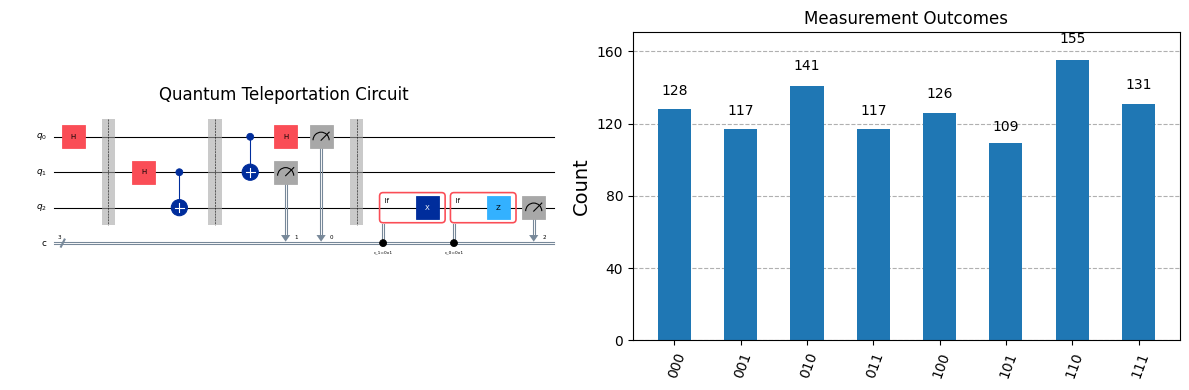

{'101': 141, '000': 109, '010': 131, '001': 124, '110': 119, '100': 128, '011': 131, '111': 141}


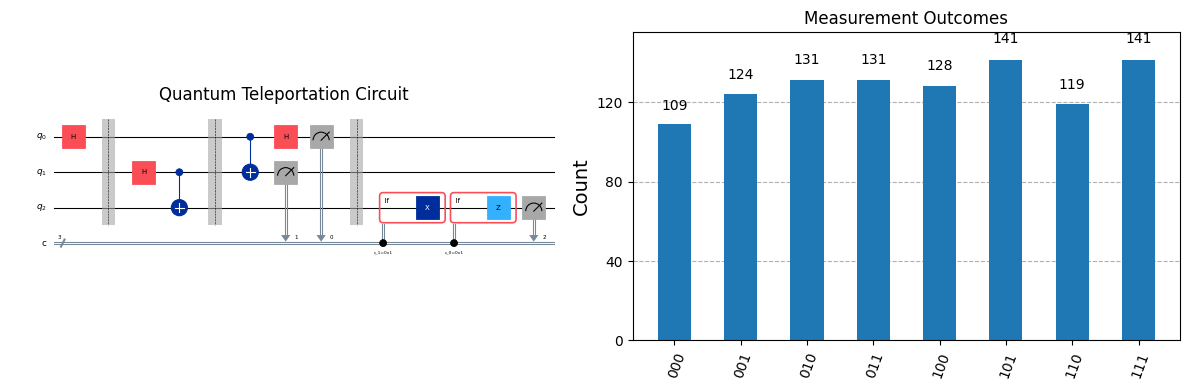

{'110': 129, '010': 119, '000': 120, '001': 120, '011': 123, '111': 129, '101': 151, '100': 133}


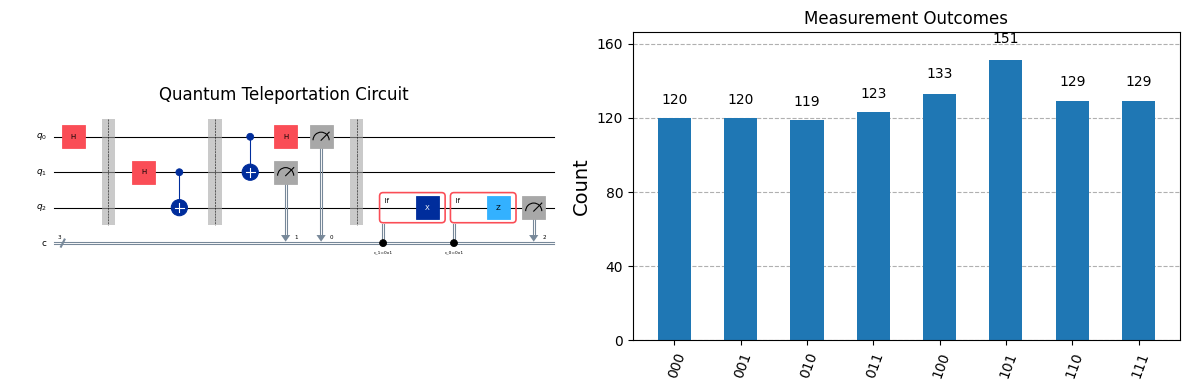

{'001': 129, '100': 132, '010': 138, '000': 134, '101': 128, '110': 125, '011': 111, '111': 127}


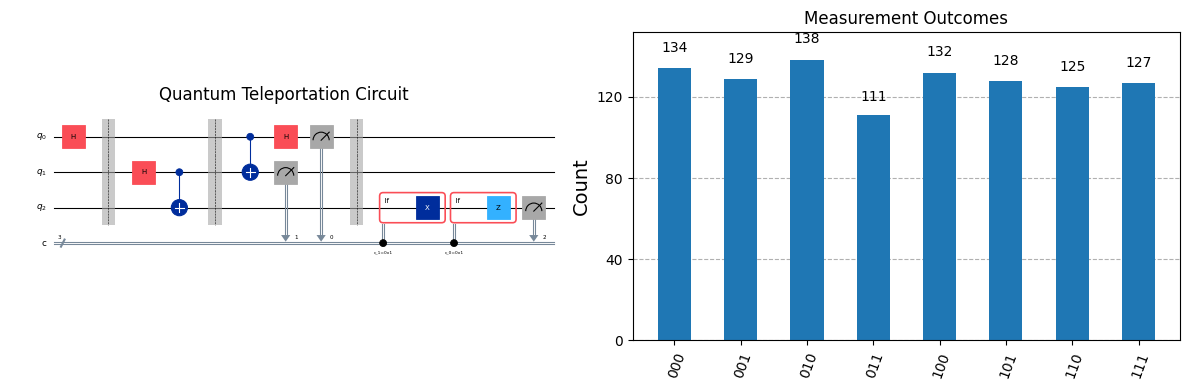

{'101': 126, '110': 154, '000': 102, '010': 120, '111': 128, '011': 125, '001': 135, '100': 134}


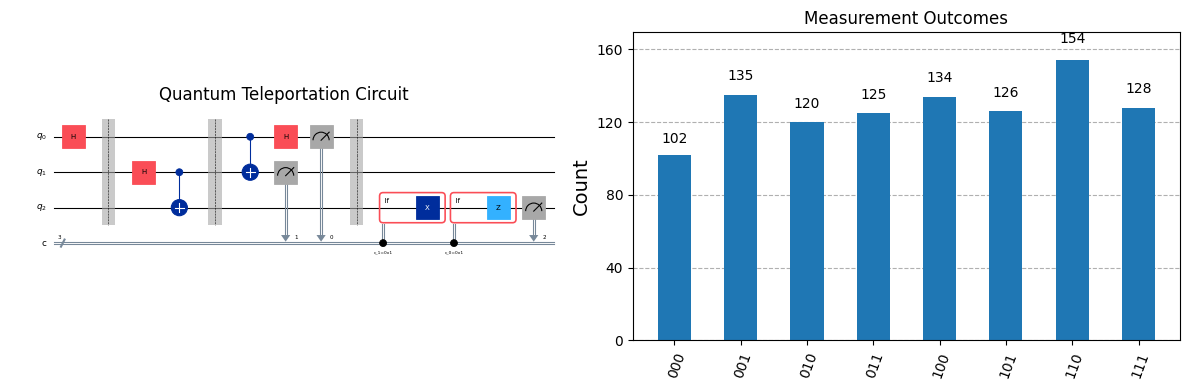

In [41]:
# --- Imports ---
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
for i in range(5):
  # --- Define registers ---
  q = QuantumRegister(3, "q")
  c = ClassicalRegister(3, "c")   # 2 bits for Bell measurement + 1 for teleported qubit
  qc = QuantumCircuit(q, c)

  # --- Step 1: Prepare state to teleport (|ψ⟩ = |+⟩) ---
  qc.h(q[0])
  qc.barrier()

  # --- Step 2: Create entanglement between q1 and q2 ---
  qc.h(q[1])
  qc.cx(q[1], q[2])
  qc.barrier()

  # --- Step 3: Bell measurement on q0 and q1 ---
  qc.cx(q[0], q[1])
  qc.h(q[0])
  qc.measure([q[0], q[1]], [c[0], c[1]])
  qc.barrier()

  # --- Step 4: Conditional corrections (new if_test syntax) ---
  with qc.if_test((c[1], 1)):   # if bit 1 == 1
      qc.x(q[2])
  with qc.if_test((c[0], 1)):   # if bit 0 == 1
      qc.z(q[2])

  # --- Step 5: Measure teleported qubit ---
  qc.measure(q[2], c[2])

  # --- Run on Aer simulator ---
  sim = AerSimulator()
  tqc = transpile(qc, sim)
  result = sim.run(tqc, shots=1024).result()
  counts = result.get_counts()

  # --- Plot results ---
  print(counts)
  plot_histogram(counts)
  plt.show()
  from matplotlib import pyplot as plt
  from qiskit.visualization import plot_histogram

  # --- Create figure layout ---
  fig, axs = plt.subplots(1, 2, figsize=(12, 4))

  # --- Left: Circuit diagram ---
  qc.draw('mpl', ax=axs[0])
  axs[0].set_title("Quantum Teleportation Circuit")

  # --- Right: Histogram of results ---
  plot_histogram(counts, ax=axs[1])
  axs[1].set_title("Measurement Outcomes")

  plt.tight_layout()
  plt.show()